In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import PIL
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#file=r'/gdrive/MyDrive/sumana_nuig/image_sentiment.csv'
file=r'/gdrive/MyDrive/sumana_nuig/all_dataset/SIMPSoN/v2_image_ctext_path.csv'

In [ ]:
df=pd.read_csv(file)
print(df)

                image_path                                               text  \
0     Dataset\img00006.jpg                                SOLIDARITY MIXTAPE    
1     Dataset\img00013.jpg                                          | dimber    
2     Dataset\img00014.jpg  i i ve FUCKIN a  WE INSIDE. << a = IDE EDI ‘ U...   
3     Dataset\img00017.jpg               ILLEGALS  aren't  they're CRIMINALS    
4     Dataset\img00019.jpg  IL ZIO, VOGLIO USCIRE Di  None is R PORTA FIGL...   
...                    ...                                                ...   
4066  Dataset\img09237.jpg                              WHITE  wet     POWER    
4067  Dataset\img09240.jpg  Wy  (GWE NEED A'SOLUTION TOD) THE IMMIGRANTIPR...   
4068  Dataset\img09241.jpg  YEAH YOU IMMIGRANTS SHUT THE FUCK UP-YOU.CANT ...   
4069  Dataset\img09242.jpg     TOP INVAMIONE  oO"       BATA TH MIGRATIONE |    
4070  Dataset\img09248.jpg              DO BLACK Lives MATTER IN iSRac) >       

      visual_label  text_la

(4071, 150528)


In [ ]:
#newarr = ab.reshape(4071, 112, 1344)
newarr = ab.reshape(4071, 224, 224, 3)
print(newarr.shape)

(4071, 224, 224, 3)


In [ ]:
print(newarr.shape)

(4071, 224, 224, 3)


In [ ]:
with open('/gdrive/MyDrive/sumana_nuig/all_dataset/SIMPSoN/img_text.npy', 'rb') as f:
    b = np.load(f)
print(b.shape)

(4071, 200, 200, 3)


In [ ]:
with open('/gdrive/MyDrive/sumana_nuig/all_dataset/SIMPSoN/simpsion_img_array.npy', 'rb') as ff:
    a = np.load(ff)
print(a.shape)

(9247, 224, 224, 3)


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization,Activation
from tensorflow.keras import Sequential
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import os
import argparse
import pickle
#import text_preprocessing as tp
import re
import shutil

import cv2
import glob


In [ ]:
file=r'/gdrive/MyDrive/sumana_nuig/all_dataset/SIMPSoN/image_to_ctext_for_model.csv'
df_text=pd.read_csv(file)
print(df_text.head())

  text clean_text  text_lable  joint_lable ctext     label
0             NaN           2            2   NaN  Positive
1             NaN           2            2   NaN  Positive
2             NaN           1            0   NaN    Nutral
3             NaN           2            2   NaN  Positive
4             NaN           2            2   NaN  Positive


In [ ]:
dtext=pd.DataFrame()
dtext[['text','label']]=df_text[['ctext','label',]]              
#dummy=pd.get_dummies(dtest['label'])
#dtest=pd.concat([dtest,dummy],axis='columns')
#dtest.drop(['label'], axis='columns', inplace=True)
dtext['text'].replace('', np.nan, inplace=True)
dtext=dtext.dropna()
dtext=dtext.drop_duplicates()
print(dtext)

                                                   text     label
5                                    solidarity mixtape  Positive
12                                               dimber  Negative
13         fuckin inside ide edi swe il killall niggers  Negative
16                                   illegals criminals  Negative
18    il zio voglio uscire di none porta figlioletio...  Negative
...                                                 ...       ...
9235                                    white wet power  Negative
9238         wy gwe need solution tod immigrantiproblem    Nutral
9239  yeah immigrants shut fuck cant boat ss tigate ...  Negative
9240                top invamione oo bata th migratione  Negative
9246                           black lives matter israc    Nutral

[4154 rows x 2 columns]


In [ ]:
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
#from tensorflow.keras.models import Sequential
from keras_preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import random
import pandas as pd
import numpy as np
TRAIN_SIZE = 0.8
#MAX_NB_WORDS = 100
#MAX_SEQUENCE_LENGTH = 10

MAX_NB_WORDS = 1000
MAX_SEQUENCE_LENGTH = 112


In [ ]:
#Training and Text Spliting
def load_tarin_test_dataset():
    #df=pd.read_csv('data_tlj07.csv', encoding='latin-1', error_bad_lines= False)
    #dtrain['text']=dtrain['text'].astype(str)
    #dtest['text']=dtest['text'].astype(str)
    #train_data=dtrain['text']
    #test_data=dtest['text']
    #random_idx_list = [random.randint(1,len(dtrain['text'])) for i in range(10)]
    #random_idx_list = [random.randint(1,len(dtest['text'])) for i in range(10)]
    df['ctext']=df['ctext'].astype(str)
    train_data, test_data = train_test_split(df['ctext'], test_size=1-0.8,random_state=7) # Splits Dataset into Training and Testing set


    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_data)
    #tokenizer1.fit_on_texts(test_data)

    word_index = tokenizer.word_index
    vocab_size = len(tokenizer.word_index) + 1
    #print("Vocabulary Size :", vocab_size)

    x_train = pad_sequences(tokenizer.texts_to_sequences(train_data), maxlen = MAX_SEQUENCE_LENGTH)
    x_test = pad_sequences(tokenizer.texts_to_sequences(test_data), maxlen = MAX_SEQUENCE_LENGTH)
    #y_train = (ytrain)
    #y_test = (ytest)
    #y_train, y_test = train_test_split(y, test_size=1-TRAIN_SIZE,random_state=7) # Splits Dataset into Training and Testing set 
    #y_train, y_test = train_test_split(dtext['af'], test_size=1-TRAIN_SIZE,random_state=7)
    

   # y_train=pd.get_dummies(ay_train)
    hy_train, hy_test = train_test_split(df['tlabel'], test_size=1-0.8,random_state=7)
    y_train=pd.get_dummies(hy_train)
    y_test=pd.get_dummies(hy_test)
    #print(train_data)
    return x_train,x_test,y_train,y_test,vocab_size,word_index







In [ ]:
x_train,x_test,y_train,y_test,vocab_size,word_index=load_tarin_test_dataset()
print("Vocabulary Size :", vocab_size)
print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Vocabulary Size : 13805
Training X Shape: (3256, 112)
Testing X Shape: (815, 112)
y_train shape: (3256, 3)
y_test shape: (815, 3)


In [ ]:
GLOVE_EMB = '/gdrive/MyDrive/sumana_nuig/glove.6B.300d.txt'
EMBEDDING_DIM = 300
#GLOVE_EMB = 'glove.twitter.27B.100d.txt'
#EMBEDDING_DIM = 100
LR = 1e-3
#BATCH_SIZE = 1024
#BATCH_SIZE = 512
EPOCHS = 10
MODEL_PATH = 'best_model.hdf5'
MAX_SEQUENCE_LENGTH=30

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB, encoding="utf8")
for line in f :
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))
#embedding
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

#embedding layer
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

Found 400000 word vectors.


In [ ]:
from keras.layers import Input,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPool3D,GlobalAveragePooling2D,MaxPool1D,GlobalAveragePooling1D
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout,Concatenate
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import pandas as pd
import numpy as np
import itertools

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout,Concatenate,GlobalAvgPool1D

In [ ]:
text_input = Input(shape=(None,), dtype='int32', name='text')
embedded_text = layers.Embedding(MAX_SEQUENCE_LENGTH, EMBEDDING_DIM)(text_input)
encoded_text = layers.LSTM(512)(embedded_text)

Epoch 1/5
66/66 [==============================] - 13s 88ms/step - loss: 1.0377 - categorical_accuracy: 0.4585 - val_loss: 0.9511 - val_categorical_accuracy: 0.5423
Epoch 2/5
66/66 [==============================] - 5s 74ms/step - loss: 0.8819 - categorical_accuracy: 0.5937 - val_loss: 1.0301 - val_categorical_accuracy: 0.5141
Epoch 3/5
66/66 [==============================] - 5s 74ms/step - loss: 0.6957 - categorical_accuracy: 0.7064 - val_loss: 1.0763 - val_categorical_accuracy: 0.5018
Epoch 4/5
66/66 [==============================] - 5s 74ms/step - loss: 0.5367 - categorical_accuracy: 0.7930 - val_loss: 1.2619 - val_categorical_accuracy: 0.5092
Epoch 5/5
66/66 [==============================] - 5s 73ms/step - loss: 0.3590 - categorical_accuracy: 0.8557 - val_loss: 1.4960 - val_categorical_accuracy: 0.5104
Accuracy =  43.92638036809816
Precision_Score  %: 53.33878920667762
F1_Score         %: 48.26273793769648
Recall_Score     %: 44.09464543393115


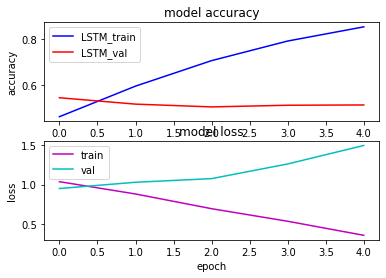

In [ ]:
from keras.layers.pooling import GlobalMaxPooling1D
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#x = SpatialDropout1D(0.5)(embedding_sequences)
#x = Conv1D(512, 5, activation='relu')(embedding_sequences)#(x)
#x = GlobalMaxPooling1D()(x)
#x = Bidirectional(LSTM(64, dropout=0.3,recurrent_dropout=0.3))(embedding_sequences)#(x)
x = Bidirectional(LSTM(64))(embedding_sequences)#(x)
#x = Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu')(x)
text=Flatten()(x)
#text=x
x = Dense(64, activation='relu')(x)
#x = Dropout(0.2)(x)
#x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(3, activation='softmax')(x)
modelcn= tf.keras.Model(sequence_input, outputs)
#Model Compile
#from tensorflow.keras.callbacks import ReduceLROnPlateau

modelcn.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

historycn = modelcn.fit(x_train, y_train, epochs=5, batch_size=50, validation_data=(x_test, y_test))

s, (at, al) = plt.subplots(2,1)
at.plot(historycn.history['categorical_accuracy'], c= 'b')
at.plot(historycn.history['val_categorical_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(historycn.history['loss'], c='m')
al.plot(historycn.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')
#<matplotlib.legend.Legend at 0x7f3739c12490>
ypred=modelcn.predict(x_test)
ypred=np.around(ypred)
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
print("Accuracy = ",(accuracy_score(y_test,ypred, normalize=True, sample_weight=None)*100))
#print('Jaccard Accuracy %:',(jaccard_score(y_test,ypred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test, ypred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test,ypred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test, ypred, average='macro'))*100)


In [ ]:
text_input = Input(shape=(None,), dtype='int32', name='text')
embedded_text = layers.Embedding(MAX_SEQUENCE_LENGTH, EMBEDDING_DIM)(text_input)
encoded_text = layers.LSTM(512)(embedded_text)

In [ ]:
# Instantiate convolutional base
image_input = Input(shape=(224, 224, 3), name='image')
vgg16 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))(image_input)
x = layers.Flatten()(vgg16) 
x = layers.Dense(256, activation='relu')(x)

In [ ]:
#concatenated image and text model
concatenated = layers.concatenate([x, encoded_text], axis=-1)
output = layers.Dense(3, activation='softmax')(concatenated)
model = Model([image_input, text_input], output)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['image[0][0]']                  
                                                                                                  
 text (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 flatten_2 (Flatten)            (None, 25088)        0           ['vgg16[0][0]']            

In [ ]:
#model.layers[1].trainable = False # freeze VGG16
#model.layers[4].set_weights([embedding_matrix])
#model.layers[4].trainable = False # freeze GloVe word embedding

In [ ]:
import cv2
dim = (150, 150)
X_image_train = []
X_label_train = tag_data
y_train = []
    
for fname in listdir(small_image_path):
    fpath = os.path.join(small_image_path, fname)
    im = cv2.imread(fpath)
    im_resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
    X_image_train.append(im_resized)
    y_train.append(1)
    
# add incorrect image and tag pairs
num_negative_samples = len(y_train)
for i in range(num_negative_samples):
    image = X_image_train[i]
    X_image_train.append(image)
    j = (i + 1) % num_negative_samples # get a different tag
    tag = X_tag_train[j]
    X_tag_train = np.append(X_tag_train, tag) 
    y_train.append(0)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
maxlen = 112
training_samples = num_of_samples
tag_vocabulary_size = 13805
max_words = tag_vocabulary_size
num_of_samples = label_df.shape[0]
tokenizer = Tokenizer(num_words=max_words)
texts = []
for tag_list in label_df_clean['word_tags']:
    texts.append(' '.join(tag_list))
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found {} unique tokens'.format(len(word_index)))
tag_data = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
#spliting training and testing dataset.
vx_train,vx_test,vy_train,vy_test=train_test_split(newarr,df["joint_label"],test_size=0.2,random_state=7)
vy_train_one_hot = to_categorical(vy_train)
vy_test_one_hot = to_categorical(vy_test)
print(vx_train.shape,vx_test.shape,vy_train_one_hot.shape,vy_test_one_hot.shape)

(3256, 224, 224, 3) (815, 224, 224, 3) (3256, 3) (815, 3)


In [ ]:
ximt=np.array(vx_train)
print(ximt.shape)

(3256, 224, 224, 3)


In [ ]:
#xxtrain=np.array(x_train)
#print(xxtrain.shape)
#avy_train_one_hot=np.array(vy_train_one_hot)
#print(avy_train_one_hot.shape)
perm = np.arange(avy_train_one_hot.shape[0])
np.random.shuffle(perm)
X_image_train = vx_train[perm]
X_tag_train   = xxtrain[perm]
y_train       = avy_train_one_hot[perm]


In [ ]:
X_image_train = np.array(X_image_train)
X_tag_train   = np.array(X_tag_train)
y_train       = np.array(y_train)
perm = np.arange(y_train.shape[0])
np.random.shuffle(perm)
X_image_train = X_image_train[perm]
X_tag_train   = X_tag_train[perm]
y_train       = y_train[perm]

In [ ]:
#perm = np.arange(vy_test_one_hot.shape[0])
#np.random.shuffle(perm)
X_image_train = X_image_train[perm]
X_tag_train   = X_tag_train[perm]
y_train       = y_train[perm]

In [ ]:
xx_test=np.array(x_test)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit([X_image_train, X_tag_train], y_train, epochs=5, batch_size=64)

Epoch 1/5
51/51 [==============================] - 110s 2s/step - loss: 1.5476 - acc: 0.3950
Epoch 2/5
51/51 [==============================] - 89s 2s/step - loss: 0.6213 - acc: 0.4570
Epoch 3/5
51/51 [==============================] - 88s 2s/step - loss: 0.6895 - acc: 0.4711
Epoch 4/5
51/51 [==============================] - 88s 2s/step - loss: 0.6816 - acc: 0.4810
Epoch 5/5
51/51 [==============================] - 88s 2s/step - loss: 0.8172 - acc: 0.4988


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history = model.fit([X_image_train, X_tag_train], y_train, epochs=5, batch_size=64, validation_data=([vx_test, xx_test],vy_test_one_hot))

Epoch 1/5
51/51 [==============================] - 99s 2s/step - loss: 1.3841 - categorical_accuracy: 0.3514 - val_loss: 1.0984 - val_categorical_accuracy: 0.3755
Epoch 2/5
51/51 [==============================] - 90s 2s/step - loss: 1.0928 - categorical_accuracy: 0.3824 - val_loss: 1.1226 - val_categorical_accuracy: 0.3521
Epoch 3/5
51/51 [==============================] - 90s 2s/step - loss: 1.0944 - categorical_accuracy: 0.3891 - val_loss: 1.0775 - val_categorical_accuracy: 0.4405
Epoch 4/5
51/51 [==============================] - 90s 2s/step - loss: 1.0652 - categorical_accuracy: 0.4103 - val_loss: 1.0905 - val_categorical_accuracy: 0.4172
Epoch 5/5
51/51 [==============================] - 90s 2s/step - loss: 1.0492 - categorical_accuracy: 0.4459 - val_loss: 1.0552 - val_categorical_accuracy: 0.4785


In [ ]:
ypred=model.predict([vx_test, xx_test])
ypred=np.around(ypred)
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
print("Accuracy = ",(accuracy_score(vy_test_one_hot,ypred, normalize=True, sample_weight=None)*100))
#print('Jaccard Accuracy %:',(jaccard_score(y_test,ypred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(vy_test_one_hot, ypred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(vy_test_one_hot,ypred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(vy_test_one_hot, ypred, average='macro'))*100)

Accuracy =  15.214723926380369
Precision_Score  %: 62.68817204301076
F1_Score         %: 23.049497767739457
Recall_Score     %: 15.389492753623188


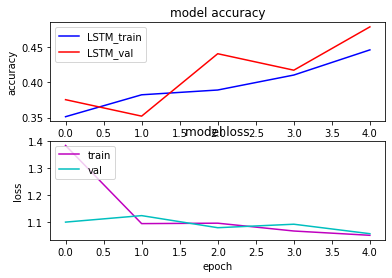

In [ ]:
#predictions.evaluate(x_test,y_test_one_hot)
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['categorical_accuracy'], c= 'b')
at.plot(history.history['val_categorical_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
y_predict_1 = loaded_model.predict([vx_test, vy_test_one_hot])

NameError: ignored

In [ ]:
#Model Prediction
dim = (150, 150)
X_image_test = []
for fname in listdir(test_image_dir):
    fpath = os.path.join(test_image_dir, fname)
    im = cv2.imread(fpath)
    im_resized = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
    X_image_test.append(im_resized)

In [ ]:
tokenizer_test = Tokenizer(num_words=max_words)
texts_1 = []
texts_2 = []
texts_all = []
for tag_list in test_image_label_df['word_tags_1']:
    texts_1.append(' '.join(tag_list))
for tag_list in test_image_label_df['word_tags_2']:
    texts_2.append(' '.join(tag_list))
texts_all.extend(texts_1)
texts_all.extend(texts_2)
tokenizer_test.fit_on_texts(texts_all)
sequences_1 = tokenizer_test.texts_to_sequences(texts_1)
sequences_2 = tokenizer_test.texts_to_sequences(texts_2)
word_index_test = tokenizer_test.word_index
print('Found {} unique tokens in test'.format(len(word_index_test)))
tag_data_test_1 = pad_sequences(sequences_1, maxlen=maxlen)
tag_data_test_2 = pad_sequences(sequences_2, maxlen=maxlen)

In [ ]:
X_image_test = np.array(X_image_test)
X_tag_test_1 = np.array(tag_data_test_1)
X_tag_test_2 = np.array(tag_data_test_2)
y_predict_1 = loaded_model.predict([X_image_test, X_tag_test_1])
y_predict_2 = loaded_model.predict([X_image_test, X_tag_test_2])

In [ ]:
inputSentence = Input(shape=(30,300))
sentenceMatrix = LSTM(64, return_sequences=True, input_shape=(30, 300))(inputSentence)

inputDeletion = Input(shape=(30, 1))
deletionMatrix = (LSTM(30, return_sequences=True, input_shape=(30, 1)))(inputDeletion)

fusion = concatenate([sentenceMatrix, y])
fusion = Dense(122, activation='relu')(fusion)
fusion = Dense(102, activation='relu')(fusion)
fusion = Dense(91, activation='sigmoid')(fusion)

F = Model(inputs=[inputSentence, inputDeletion], outputs=fusion)

ValueError: ignored

In [ ]:
inputSentence = Input(shape=(30, 91))
print(inputSentence.shape)

(None, 30, 91)


In [ ]:
print(sequence_input)

KerasTensor(type_spec=TensorSpec(shape=(None, 30), dtype=tf.int32, name='input_4'), name='input_4', description="created by layer 'input_4'")


In [ ]:
print(sequence_input.shape)
print(embedding_sequences.shape)

(None, 30)
(None, 30, 300)


# New Section

In [ ]:
print(df)

In [ ]:
file1=r'/gdrive/MyDrive/sumana_nuig/all_dataset/SIMPSoN/image_train_test.csv'
dff=pd.read_csv(file1)

In [ ]:
#spliting training and testing dataset.
vx_train,vx_test,vy_train,vy_test=train_test_split(b,df["visual_label"],test_size=0.2,random_state=7)
vy_train_one_hot = to_categorical(vy_train)
vy_test_one_hot = to_categorical(vy_test)
print(vx_train.shape,vx_test.shape,vy_train_one_hot.shape,vy_test_one_hot.shape)

(3256, 200, 200, 3) (815, 200, 200, 3) (3256, 3) (815, 3)


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.applications.vgg16 import VGG16
from keras.layers import Input,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPool3D,GlobalAveragePooling2D,concatenate,Concatenate
from keras.layers import Embedding
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model

In [ ]:
train_data_dir='/gdrive/MyDrive/sumana_nuig/all_dataset/SIMPSoN//train'
validation_data_dir='/gdrive/MyDrive/sumana_nuig/all_dataset/SIMPSoN//test'

In [ ]:
img_path='/gdrive/MyDrive/sumana_nuig/all_dataset/SIMPSoN//dataset/img00005.jpg'
from keras.preprocessing import image
def prediction(img_path):
    org_img = image.load_img(img_path)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(org_img)                           
    plt.axis('off')
    plt.show()


    # Extract features
    features = conv_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

    # Make prediction
    try:
        prediction = model.predict(features)
    except:
        prediction = model.predict(features.reshape(1, 7*7*512))
        
    classes = ["positive", "negative", "neutral"]
    print("I see..."+str(classes[np.argmax(np.array(prediction[0]))]))

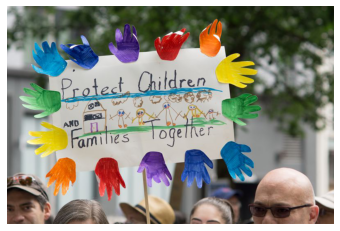

In [ ]:
img_path='/gdrive/MyDrive/sumana_nuig/all_dataset/SIMPSoN//dataset/img00005.jpg'
org_img = image.load_img(img_path)
img = image.load_img(img_path, target_size=(224, 224,3))
img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
#img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
plt.imshow(org_img)                           
plt.axis('off')
plt.show()




In [ ]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(7,7,512)))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 6)                 3078      
                                                                 
Total params: 3,078
Trainable params: 3,078
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#spliting training and testing dataset.
x_train,x_test,y_train,y_test=train_test_split(a,df["Visual_Sentiment"],test_size=0.2,random_state=7)
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(x_train.shape,x_test.shape,y_train_one_hot.shape,y_test_one_hot.shape)

(7397, 224, 224, 3) (1850, 224, 224, 3) (7397, 3) (1850, 3)


In [ ]:
# Instantiate convolutional base

conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(2, 224,3))

# Show architecture
#conv_base.summary()

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model= Sequential()
for layer in conv_base.layers:
  layers.trainable=False
  model.add(layer)

In [ ]:
y = conv_base.output
y = GlobalAveragePooling2D()(y)
y=Dense(units=64,activation="relu")(y)
y=Flatten()(y)

In [ ]:

model.add(Dense(512,activation='relu'))
#model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())

In [ ]:
z = Concatenate([y, text])
#z=Dense(units=128,activation="relu")(z)
#z=Dense(units=6,activation="relu")(z)
#Z=Dropout(0.50)(z)
prediction=Dense(3,activation='softmax')(z)

TypeError: ignored

In [ ]:
model.add(Flatten())
model.add(Dense(512,activation='relu'))
#model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(3,activation='softmax'))


Epoch 1/3
116/116 [==============================] - 285s 2s/step - loss: 2400713472.0000 - categorical_accuracy: 0.5349 - val_loss: 0.9690 - val_categorical_accuracy: 0.5805
Epoch 2/3
116/116 [==============================] - 265s 2s/step - loss: 0.9741 - categorical_accuracy: 0.5797 - val_loss: 0.9688 - val_categorical_accuracy: 0.5805
Epoch 3/3
116/116 [==============================] - 265s 2s/step - loss: 0.9722 - categorical_accuracy: 0.5797 - val_loss: 0.9703 - val_categorical_accuracy: 0.5805
Accuracy =  58.05405405405405
Precision_Score  %: 19.35135135135135
F1_Score         %: 24.48700410396717
Recall_Score     %: 33.33333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


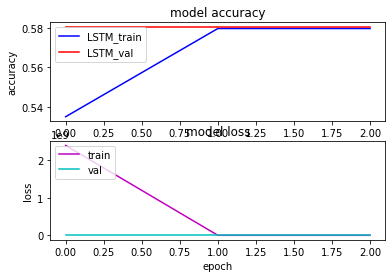

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history = model.fit(x_train, y_train_one_hot, epochs=3, batch_size=64, validation_data=(x_test, y_test_one_hot))

#predictions.evaluate(x_test,y_test_one_hot)
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['categorical_accuracy'], c= 'b')
at.plot(history.history['val_categorical_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')
#<matplotlib.legend.Legend at 0x7f3739c12490>
ypred=model.predict(x_test)
ypred=np.around(ypred)
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
print("Accuracy = ",(accuracy_score(y_test_one_hot,ypred, normalize=True, sample_weight=None)*100))
#print('Jaccard Accuracy %:',(jaccard_score(y_test,ypred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test_one_hot, ypred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test_one_hot,ypred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test_one_hot, ypred, average='macro'))*100)

In [ ]:
from matplotlib import test
#verifying results or geting sentiment directly on a test image
index=33
testprediction=model.predict_classes([[test_image]])
predicted_class=prediction[0][0]
print('\n')
print('labels',train_generator.class_indices)
plt.imshow(training_data[index])

In [ ]:
input=(224*224*3)

In [ ]:
x = conv_base.output
x = GlobalAveragePooling2D()(x)
x=Flatten()(x)
x=Dense(units=4096,activation="relu")(x)
x = Dropout(0.5)(x)
x=Dense(units=512,activation="relu")(x)
x=Dense(units=256,activation="relu")(x)
x = Dropout(0.5)(x)
x=Dense(units=128,activation="relu")(x)
x=Dense(units=64,activation="relu")(x)
x=Dense(units=32,activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation= 'softmax')(x)
vmodel = Model(inputs = conv_base.input, outputs = predictions)

Epoch 1/5
51/51 [==============================] - 162s 3s/step - loss: 1.3738 - categorical_accuracy: 0.3406 - val_loss: 1.0975 - val_categorical_accuracy: 0.3669
Epoch 2/5
51/51 [==============================] - 117s 2s/step - loss: 1.0969 - categorical_accuracy: 0.3636 - val_loss: 1.0968 - val_categorical_accuracy: 0.3669
Epoch 3/5
51/51 [==============================] - 117s 2s/step - loss: 1.0963 - categorical_accuracy: 0.3587 - val_loss: 1.0974 - val_categorical_accuracy: 0.3669
Epoch 4/5
51/51 [==============================] - 117s 2s/step - loss: 1.0948 - categorical_accuracy: 0.3621 - val_loss: 1.0972 - val_categorical_accuracy: 0.3669
Epoch 5/5
51/51 [==============================] - 117s 2s/step - loss: 1.0948 - categorical_accuracy: 0.3557 - val_loss: 1.0974 - val_categorical_accuracy: 0.3669
Accuracy =  0.0
Precision_Score  %: 0.0
F1_Score         %: 0.0
Recall_Score     %: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


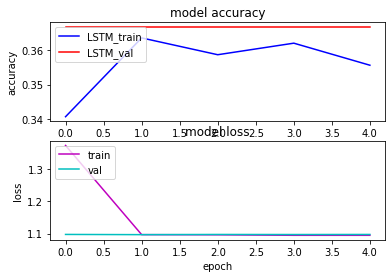

In [ ]:
vmodel.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history = vmodel.fit(x_train, y_train_one_hot, epochs=5, batch_size=64, validation_data=(x_test, y_test_one_hot))

#predictions.evaluate(x_test,y_test_one_hot)
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['categorical_accuracy'], c= 'b')
at.plot(history.history['val_categorical_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')
#<matplotlib.legend.Legend at 0x7f3739c12490>
ypred=vmodel.predict(x_test)
ypred=np.around(ypred)
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
print("Accuracy = ",(accuracy_score(y_test_one_hot,ypred, normalize=True, sample_weight=None)*100))
#print('Jaccard Accuracy %:',(jaccard_score(y_test,ypred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test_one_hot, ypred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test_one_hot,ypred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test_one_hot, ypred, average='macro'))*100)


In [ ]:
y = conv_base.output
y = GlobalAveragePooling2D()(y)
y=Dense(units=64,activation="relu")(y)
y=Flatten()(y)
#vg = vg.output
#vg = GlobalAveragePooling2D()(vg)
#vg=Dense(units=512,activation="relu")(vg)


In [ ]:
model=Sequential()
model.add(conv_base)
model.add(Conv2D(kernel_size=(3,3),filters=32,activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu'))
model.add(Conv2D(kernel_size=(3,3),filters=256,activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(8192,activation='relu'))
model.add(Dense(1028,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [ ]:
z = concatenate([y, text])
z=Dense(units=128,activation="relu")(z)
z=Dense(units=32,activation="relu")(z)
predictions = Dense(3, activation= 'softmax')(z)
#model = Model(inputs = conv_base.input, outputs = predictions)
#model = Model([image_input, text_input], [z])
jointmodel = Model(inputs = [img_in, text_in], outputs = predictions)

ValueError: ignored

In [ ]:

#z=Dense(units=32,activation="relu")(z)
#z = Dropout(0.5)(z)
predictions = Dense(3, activation= 'softmax')(z)
model = Model([image_input, text_input], [z])
#model = Model(inputs = conv_base.input, outputs = predictions)

In [ ]:
input_data=224*224*3

In [ ]:
#img = Input(shape=(1,1024))
#vec = Input(shape=(1,5))
#res = Concatenate(axis=-1)([img, vec])
#model = Model(inputs=[img, vec], outputs=res)

In [ ]:
img_in=Input(shape=(224,224,3))
text_in=Input(shape=30)

In [ ]:
res = concatenate([y, x])

In [ ]:

z=Dense(units=128,activation="relu")(z)
z=Dense(units=32,activation="relu")(z)
predictions = Dense(3, activation= 'softmax')(z)
#model = Model(inputs = conv_base.input, outputs = predictions)
#model = Model([image_input, text_input], [z])
jointmodel = Model(inputs = [img_in, text_in], outputs = predictions)

TypeError: ignored

In [ ]:
a = []
while(1):
    a.append(‘1’)

SyntaxError: ignored

In [ ]:
#PCA
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=5)


In [ ]:
train_img = pca.fit(x_train)
test_img = pca.fit(x_test)

In [ ]:
imgpath=glob.glob("/gdrive/MyDrive/sumana_nuig/all_dataset/Data//test/*.jpg")

4145


In [ ]:
train_data_dir='/gdrive/MyDrive/sumana_nuig/all_dataset/SIMPSoN//train'
validation_data_dir='/gdrive/MyDrive/sumana_nuig/all_dataset/SIMPSoN//test'

In [ ]:
train_data_dir1='/gdrive/MyDrive/sumana_nuig/all_dataset/Data//train'
validation_data_dir1='/gdrive/MyDrive/sumana_nuig/all_dataset/Data//test'

In [ ]:
#Data Augumentation
datagen=ImageDataGenerator(
        rescale=1./255, 
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=30,
        validation_split=0.2)

In [ ]:
train_generator=datagen.flow_from_directory(
        train_data_dir,
        target_size=(224,224),
        batch_size=32,
        subset="training",
        class_mode='categorical')#binary)

Found 7217 images belonging to 3 classes.


In [ ]:
validation_generator=datagen.flow_from_directory(
        validation_data_dir,target_size=(224,224),
        batch_size=32,
        subset="validation",
        class_mode='categorical')#

Found 54 images belonging to 3 classes.


In [ ]:
conv_base.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),loss='categorical_crossentropy',metrics=['categorical_accuracy'])
history = vmodel.fit(train_generator,
                    epochs=5,
                    validation_data=(validation_generator))


NameError: ignored

In [ ]:
loss, acc = vmodel.evaluate(validation_generator, verbose=0)
print('loss: ', loss, 'accuracy: ', acc)

loss:  1.0996841192245483 accuracy:  0.35185185074806213


In [ ]:
loss, acc = vmodel.evaluate(validation_generator, verbose=0)
print('loss: ', loss, 'accuracy: ', acc)

loss:  1.0997594594955444 accuracy:  0.35185185074806213


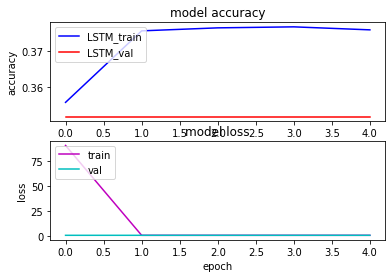

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['categorical_accuracy'], c= 'b')
at.plot(history.history['val_categorical_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')
#<matplotlib.legend.Legend at 0x7f3739c12490>


In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
t = SpatialDropout1D(0.3)(embedding_sequences)
t = Conv1D(64, 5, activation='relu')(t)
t = GlobalMaxPool1D()(t)
#x = Bidirectional(LSTM(64, dropout=0.3,recurrent_dropout=0.3))(x)
#x = Dense(64, kernel_regularizer=regularizers.l2(0.01), activation='relu')(x)
#t = Dense(64, activation='relu')(t)

In [ ]:
x = conv_base.output
x = GlobalAveragePooling2D()(x)

In [ ]:
x = conv_base.output
x = GlobalAveragePooling2D()(x)
x=Dense(units=4096,activation="relu")(x)
x = Dropout(0.5)(x)
x=Dense(units=512,activation="relu")(x)
x=Dense(units=256,activation="relu")(x)
x = Dropout(0.5)(x)
x=Dense(units=128,activation="relu")(x)
x=Dense(units=64,activation="relu")(x)

In [ ]:
image_input=conv_base.input
text_input=sequence_input

In [ ]:
z = Concatenate()([x, t])
#z=Dense(units=32,activation="relu")(z)
#z = Dropout(0.5)(z)
predictions = Dense(3, activation= 'softmax')(z)
model = Model([image_input, text_input], [z])
#model = Model(inputs = conv_base.input, outputs = predictions)

ValueError: ignored

In [ ]:
x = conv_base.output
x = GlobalAveragePooling2D()(x)
x=Dense(units=4096,activation="relu")(x)
x = Dropout(0.5)(x)
x=Dense(units=512,activation="relu")(x)
x=Dense(units=256,activation="relu")(x)
x = Dropout(0.5)(x)
x=Dense(units=128,activation="relu")(x)
x=Dense(units=64,activation="relu")(x)
x=Dense(units=32,activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation= 'softmax')(x)
#vmodel = Model(inputs = conv_base.input, outputs = predictions)

AttributeError: ignored

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

# Compile model

#vmodel.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['acc'])
vmodel.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='categorical_crossentropy',metrics=['acc'])

# Train model
history = vmodel.fit(train_generator,
                    epochs=10,
                    batch_size=100
                    validation_data=(validation_generator))

Epoch 1/10
100/113 [=========================>....] - ETA: 3:21 - loss: 1289.6810 - acc: 0.3670

KeyboardInterrupt: ignored

In [ ]:
loss, acc = vmodel.evaluate(validation_generator,steps=3, verbose=0)
print('loss: ', loss, 'accuracy: ', acc)

1/1 [==============================] - 1s 904ms/step - loss: 1.0995 - acc: 0.3519
loss:  1.099539875984192 accuracy:  0.35185185074806213


Text(0.5, 1.0, 'Training and validation loss')

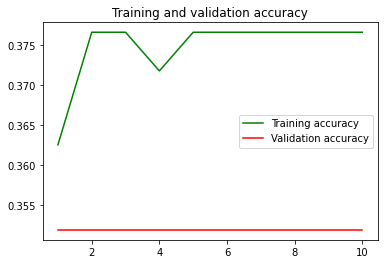

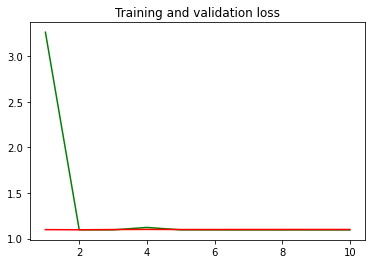

In [ ]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')

In [ ]:
# Extract features
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 64

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count,3))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(224,224),
                                            batch_size = batch_size,
                                            class_mode='categorical')
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(train_data_dir, 7397)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(valid_data_dir, 1850)
# test_features, test_labels = extract_features(test_dir, test_size)

Found 9018 images belonging to 3 classes.


ValueError: ignored

In [ ]:
train_labels
# print(len(train_labels))

In [ ]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(7,7,512)))
model.add(Dense(3, activation='softmax'))
model.summary()

In [ ]:
from keras.callbacks.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

# Compile model
from keras.optimizers import Adam
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    callbacks=[checkpoint],
                    validation_data=(validation_features, validation_labels))


In [ ]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.preprocessing import image
def prediction(img_path):
    org_img = image.load_img(img_path)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(org_img)                           
    plt.axis('off')
    plt.show()


    # Extract features
    features = conv_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

    # Make prediction
    try:
        prediction = model.predict(features)
    except:
        prediction = model.predict(features.reshape(1, 7*7*512))
        
    classes = ["buildings", "forest", "glacier", "mountains", "sea", "street"]
    print("I see..."+str(classes[np.argmax(np.array(prediction[0]))]))

In [ ]:
pred_dir = "/kaggle/input/intel-image-classification/seg_pred/seg_pred/"
import random
pred_files = random.sample(os.listdir(pred_dir),10)
for f in pred_files:
    prediction(pred_dir+f)

In [ ]:
#Data Augumentation
datagen=ImageDataGenerator(
        rescale=1./255, 
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=30,
        validation_split=0.2)


In [ ]:
train_generator=datagen.flow_from_directory(
        train_data_dir,
        target_size=(224,224),
        batch_size=64,
        subset="training",
        class_mode='categorical')#binary)

Found 7216 images belonging to 3 classes.


In [ ]:
val_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
validation_generator=datagen.flow_from_directory(
        validation_data_dir,target_size=(224,224),
        batch_size=64,
        subset="validation",
        class_mode='categorical')#

Found 54 images belonging to 3 classes.


In [ ]:
#train_generator.class_indices
validation_generator.class_indices

{'negative': 0, 'neutral': 1, 'positive': 2}

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3)),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 #
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 #
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 #
                                 tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 #
                                 tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 #
                                 tf.keras.layers.Flatten(),
                                 #
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 #
                                # tf.keras.layers.Dense(3,activation='softmax')
                                 ])


In [ ]:
from tensorflow.keras.callbacks import History
history=History()

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])
model.fit_generator(train_generator,steps_per_epoch=5,epochs=20,callbacks=[history],
        validation_data=validation_generator,
        validation_steps=3)
model.evaluate(train_generator, validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
1804/1804 [==============================] - 1477s 814ms/step - loss: 1.1116 - accuracy: 0.3739 - val_loss: 1.0656 - val_accuracy: 0.3333
Epoch 2/20
1804/1804 [==============================] - 136s 75ms/step - loss: 1.0968 - accuracy: 0.3868 - val_loss: 1.2679 - val_accuracy: 0.2500
Epoch 3/20
1804/1804 [==============================] - 133s 73ms/step - loss: 1.0941 - accuracy: 0.3893 - val_loss: 1.1479 - val_accuracy: 0.2500
Epoch 4/20
1804/1804 [==============================] - 131s 72ms/step - loss: 1.0900 - accuracy: 0.3929 - val_loss: 1.2468 - val_accuracy: 0.1667
Epoch 5/20
1804/1804 [==============================] - 130s 72ms/step - loss: 1.0955 - accuracy: 0.3984 - val_loss: 1.0575 - val_accuracy: 0.5000
Epoch 6/20
1804/1804 [==============================] - 129s 72ms/step - loss: 1.0974 - accuracy: 0.3963 - val_loss: 0.9422 - val_accuracy: 0.4167
Epoch 7/20
1804/1804 [==============================] - 129s 71ms/step - loss: 1.0959 - accuracy: 0.3941 - val_loss:

ValueError: ignored

In [ ]:
loss, acc = model.evaluate_generator(validation_generator, steps=3, verbose=0)
print('loss: ', loss, 'accuracy: ', acc) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


loss:  1.797263264656067 accuracy:  0.25


In [ ]:
from keras.layers import Input,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPool3D,GlobalAveragePooling2D
from keras.layers import Embedding
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model


In [ ]:
Vgg_model = VGG16(weights='imagenet', include_top=False, input_shape= (224,224,3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
x = Vgg_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation= 'softmax')(x)
vmodel = Model(inputs = Vgg_model.input, outputs = predictions)

In [ ]:
vmodel.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])
vmodel.fit(train_generator,epochs=10,
        validation_data=validation_generator)

loss, acc = vmodel.evaluate_generator(validation_generator, steps=3, verbose=0)
print('loss: ', loss, 'accuracy: ', acc) 

Epoch 1/10
1804/1804 [==============================] - 460s 254ms/step - loss: 1.1543 - accuracy: 0.3467 - val_loss: 1.1119 - val_accuracy: 0.2778
Epoch 2/10
1804/1804 [==============================] - 453s 251ms/step - loss: 1.1393 - accuracy: 0.3501 - val_loss: 1.0965 - val_accuracy: 0.3519
Epoch 3/10
1804/1804 [==============================] - 453s 251ms/step - loss: 1.1356 - accuracy: 0.3614 - val_loss: 1.1018 - val_accuracy: 0.3519
Epoch 4/10
1804/1804 [==============================] - 453s 251ms/step - loss: 1.1455 - accuracy: 0.3625 - val_loss: 1.1009 - val_accuracy: 0.3704
Epoch 5/10
1804/1804 [==============================] - 452s 251ms/step - loss: 1.1216 - accuracy: 0.3593 - val_loss: 1.0956 - val_accuracy: 0.3519
Epoch 6/10
1804/1804 [==============================] - 453s 251ms/step - loss: 1.1266 - accuracy: 0.3631 - val_loss: 1.0962 - val_accuracy: 0.3519
Epoch 7/10
1804/1804 [==============================] - 452s 251ms/step - loss: 1.1305 - accuracy: 0.3635 - val_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """


loss:  0.9599475860595703 accuracy:  0.75


In [ ]:

x = Vgg_model.output
x = GlobalAveragePooling2D()(x)
x=Dense(units=4096,activation="relu")(x)
x=Dense(units=512,activation="relu")(x)
x=Dense(units=512,activation="relu")(x)
x = Dropout(0.5)(x)
x=Dense(units=256,activation="relu")(x)
x = Dropout(0.5)(x)
x=Dense(units=128,activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation= 'softmax')(x)
vmodel = Model(inputs = Vgg_model.input, outputs = predictions)

In [ ]:
vmodel.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])
vmodel.fit(train_generator,epochs=10,
        validation_data=validation_generator)

loss, acc = vmodel.evaluate(validation_generator, steps=3, verbose=0)
print('loss: ', loss, 'accuracy: ', acc) 

Epoch 1/10
113/113 [==============================] - 1543s 13s/step - loss: 2115.1553 - accuracy: 0.3743 - val_loss: 1.0983 - val_accuracy: 0.3519
Epoch 2/10
113/113 [==============================] - 132s 1s/step - loss: 1.0957 - accuracy: 0.3749 - val_loss: 1.0988 - val_accuracy: 0.3519
Epoch 3/10
113/113 [==============================] - 131s 1s/step - loss: 1.0952 - accuracy: 0.3753 - val_loss: 1.0979 - val_accuracy: 0.3519
Epoch 4/10
113/113 [==============================] - 132s 1s/step - loss: 1.0960 - accuracy: 0.3762 - val_loss: 1.1000 - val_accuracy: 0.3519
Epoch 5/10
113/113 [==============================] - 130s 1s/step - loss: 1.0954 - accuracy: 0.3760 - val_loss: 1.0979 - val_accuracy: 0.3519
Epoch 6/10
113/113 [==============================] - 130s 1s/step - loss: 1.0954 - accuracy: 0.3764 - val_loss: 1.0987 - val_accuracy: 0.3519
Epoch 7/10
113/113 [==============================] - 126s 1s/step - loss: 1.0944 - accuracy: 0.3764 - val_loss: 1.1007 - val_accuracy: 0

In [ ]:
loss, acc = vmodel.evaluate_generator(validation_generator, steps=3, verbose=0)
print('loss: ', loss, 'accuracy: ', acc) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


loss:  1.0881696939468384 accuracy:  0.4166666567325592


In [ ]:
history = vmodel.fit_generator(train_generator,
                steps_per_epoch = train_generator.samples // 64,
                validation_data=validation_generator,
                validation_steps=validation_generator.samples // batch_size,
                epochs=epochs,
                verbose=1,
                callbacks=[csv_logger, checkpointer])

loss, acc = model.evaluate_generator(validation_generator, steps=3, verbose=0)
print('loss: ', loss, 'accuracy: ', acc) # loss:  0.4534463981787364 accuracy:  0.8333333


In [ ]:
fmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = fmodel.fit(X_train, y_train_one_hot, batch_size=64, epochs=10,validation_data=(X_test, y_test_one_hot))
fmodel.evaluate(X_test,y_test_one_hot)

In [ ]:
model.fit_generator(train_generator,epochs=20,callbacks=[history],
        validation_data=validation_generator,
        validation_steps=3)
model.evaluate(train_generator, validation_generator)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [ ]:
from tensorflow.keras.callbacks import History
history=History()

In [ ]:
model.fit_generator(train_generator,steps_per_epoch=5,epochs=20,callbacks=[history],
        validation_data=validation_generator,
        validation_steps=3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
5/5 [==============================] - 9s 2s/step - loss: 3.6541 - accuracy: 0.4500 - val_loss: 1.0790 - val_accuracy: 0.4167
Epoch 2/20
5/5 [==============================] - 7s 1s/step - loss: 1.1393 - accuracy: 0.1000 - val_loss: 1.1004 - val_accuracy: 0.3333
Epoch 3/20
5/5 [==============================] - 6s 1s/step - loss: 1.0927 - accuracy: 0.4000 - val_loss: 1.1467 - val_accuracy: 0.2500
Epoch 4/20
5/5 [==============================] - 5s 1s/step - loss: 1.1006 - accuracy: 0.4500 - val_loss: 1.0819 - val_accuracy: 0.5833
Epoch 5/20
5/5 [==============================] - 6s 1s/step - loss: 1.1057 - accuracy: 0.1500 - val_loss: 1.0924 - val_accuracy: 0.4167
Epoch 6/20
5/5 [==============================] - 5s 976ms/step - loss: 1.1077 - accuracy: 0.4500 - val_loss: 1.0896 - val_accuracy: 0.4167
Epoch 7/20
5/5 [==============================] - 5s 980ms/step - loss: 1.0968 - accuracy: 0.3500 - val_loss: 1.1093 - val_accuracy: 0.3333
Epoch 8/20
5/5 [===================

In [ ]:
model.fit(train_generator,steps_per_epoch=5,epochs=20,callbacks=[history],
        validation_data=validation_generator,
        validation_steps=3)
model.evaluate(train_generator, validation_generator)

Epoch 1/20
5/5 [==============================] - 4s 775ms/step - loss: 1.0989 - accuracy: 0.3500 - val_loss: 1.1868 - val_accuracy: 0.2500
Epoch 2/20
5/5 [==============================] - 4s 807ms/step - loss: 1.1013 - accuracy: 0.2500 - val_loss: 1.1181 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 4s 681ms/step - loss: 1.1044 - accuracy: 0.4000 - val_loss: 1.0845 - val_accuracy: 0.3333
Epoch 4/20
5/5 [==============================] - 4s 865ms/step - loss: 1.1245 - accuracy: 0.4000 - val_loss: 1.0832 - val_accuracy: 0.4167
Epoch 5/20
5/5 [==============================] - 4s 893ms/step - loss: 1.0922 - accuracy: 0.2000 - val_loss: 1.1234 - val_accuracy: 0.3333
Epoch 6/20
5/5 [==============================] - 4s 819ms/step - loss: 1.1275 - accuracy: 0.2500 - val_loss: 1.1102 - val_accuracy: 0.3333
Epoch 7/20
5/5 [==============================] - 4s 815ms/step - loss: 1.1062 - accuracy: 0.3500 - val_loss: 1.0786 - val_accuracy: 0.5833
Epoch 8/20
5/5 [====

ValueError: ignored

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


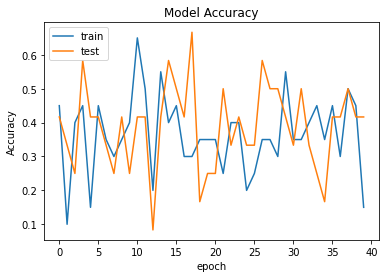

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

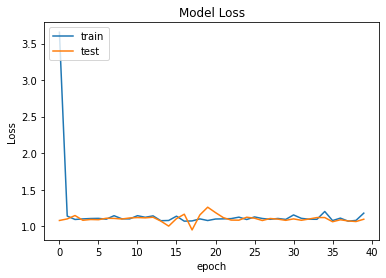

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
ypred=modeltb.predict(x_test)
ypred=np.around(ypred)
from sklearn.metrics import accuracy_score,jaccard_score,precision_score,recall_score,f1_score
print("Accuracy = ",(accuracy_score(y_test,ypred, normalize=True, sample_weight=None)*100))
#print('Jaccard Accuracy %:',(jaccard_score(y_test,ypred, average='macro'))*100)
print('Precision_Score  %:',(precision_score(y_test, ypred, average ='macro'))*100)
print('F1_Score         %:',(f1_score(y_test,ypred, average='macro'))*100)
print('Recall_Score     %:',(recall_score(y_test, ypred, average='macro'))*100)

In [ ]:
training_data=[]
def create_training_data():
   for category in CATEGORIES:
	    path=os.path.join(DATADIR,category)
  class_num=CATEGORIES.index(category)
	    for img in os.listdir(path):
	      try:
	       img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
	       newarray=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)
	       training_data.append([new_array,class_num])
	      except Exception as e:
	      pass
create_training_data()


IndentationError: ignored

In [ ]:
DATADIR="X:/gdrive/MyDrive/sumana_nuig/all_dataset/SIMPSoN/Dataset"
CATEGORIES=["negative","neutral","positive"]

for categoty in CATEGOTIES:
	path=os.path.join(DATADIR,category)
	for img in os.listdir(path):
	img_array=cv.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
	plt.imshow(img_array,cmap="gary")
	plt.show()
	break

print(img_array.shape)

IMG_size=50
newarray=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)
plt.imshow((new_array,cmap="gray")
plt.show

training_data=[]
def create_training_data():
   for categoty in CATEGOTIES:
	path=os.path.join(DATADIR,category)
        class_num=CATEGORYS.index(category)
	for img in os.listdir(path):
	   try:
	       img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
	       newarray=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)
	       training_data.append([new_array,class_num])
	   except Exception as e:
	       pass
create_training_data()

print(len(training_data)



import random
random.shuffle(training_data)

for sample in training_data[:10]:
	print(sample[1])

x=[]
y=[]

for features, label in training_data:
	x.append(features)
	y.append(label)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
#image datasetspliting training and testing
train_image=[]
train_labels=[]
shape=(128,128)
root_path='/gdrive/MyDrive/sumana_nuig/all_dataset/SIMPSoN/test'


In [ ]:
categories=["negative","neutral","positive"]

In [ ]:
for i in categories:
   folder_name=os.path.join(root_path,str(i))
   #path_list=os.listdir(folder_name)
   #print path_list
   for j in os.listdir(folder_name):
    # if '.jpg' in j:
        #print current_path +j
	   train_labels.append(i)
	   img=cv2.imread(os.path.join(folder_name,j))
	   img=cv2.resize(img,shape)
	   train_image.append(img)

(128, 128, 3)

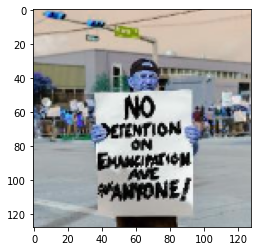

In [ ]:
image=np.array(img)
plt.imshow(img)
img.shape

In [ ]:
target=[]

In [ ]:
for i in range(0,len(targets)):
    if targets[i]=='negative' :
       target.append(0)
    elif targets[i]=='neutral':
      target.append(1)
    else :
      target.append(2)


In [ ]:
# convert train images to array
images=np.array(train_image)
print(images.shape)

(279, 128, 128, 3)


In [ ]:
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization,Activation
from tensorflow.keras import Sequential
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split


In [ ]:
#spliting training and testing dataset.
x_train,x_test,y_train,y_test=train_test_split(images,target,test_size=0.01,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(276, 128, 128, 3) (3, 128, 128, 3) (276,) (3,)


In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
from keras.models import Sequential

In [ ]:
#creating sequencial model
model=Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=8,activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(kernel_size=(3,3),filters=16,activation='relu'))
model.add(Conv2D(kernel_size=(3,3),filters=32,activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(8192,activation='relu'))
model.add(Dense(1028,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))



NameError: ignored

In [ ]:
#model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='adam')
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 8)       224       
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 16)      1168      
                                                                 
 conv2d_6 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 59, 59, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                  

In [ ]:
history = model.fit(x_train, y_train_one_hot, batch_size=20, epochs=5, verbose=1,
                    validation_data=(x_test, y_test_one_hot))

Epoch 1/5


ValueError: ignored

In [ ]:
model.evaluate(x_test,y_test_one_hot)

1/1 [==============================] - 0s 435ms/step - loss: 1.0754 - accuracy: 1.0000


[1.075371265411377, 1.0]